In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
excel_file = '/Users/marichkapenhryn/Downloads/PG_Data_Science_Test_task.xlsx'

# Завантаження першого аркуша (Sales Table)
df_sales = pd.read_excel(excel_file, sheet_name='raw sales data', engine='openpyxl')

# Видаляємо стовпeць week_of_sale
df_sales = df_sales.drop(columns=['week_of_sale'])

print(df_sales.head())
print(df_sales.dtypes)

   Item_purchased_count  Price_initial  Discount    Sales_channel       date  \
0                     1           69.0      40.0          Digital 2022-01-01   
1                     1           69.0      20.0  Indirect Retail 2022-01-01   
2                     1           69.0       0.0  Indirect Retail 2022-01-01   
3                     1           69.0      40.0          Digital 2022-01-01   
4                     1           69.0      40.0          Digital 2022-01-01   

   Day  Week  Month    Year  
0    6  52.0    1.0  2021.0  
1    6  52.0    1.0  2021.0  
2    6  52.0    1.0  2021.0  
3    6  52.0    1.0  2021.0  
4    6  52.0    1.0  2021.0  
Item_purchased_count             int64
Price_initial                  float64
Discount                       float64
Sales_channel                   object
date                    datetime64[ns]
Day                              int64
Week                           float64
Month                          float64
Year                       

In [172]:
# Cleaning sales sheet
#Кількість проданих товарів (Item_purchased_count)
#Початкова ціна (Price_initial)
#Знижка (Discount)
#Канал продажу (Sales_channel)
#Дата покупки (date)
#День тижня (Day)
#Тиждень продажу (Week)
#Місяць (Month)
#Рік (Year)

# Заповнюємо пропущені значення в колонці 'Year', 'Month', 'Week'
df_sales['Year'] = df_sales['Year'].fillna(df_sales['date'].dt.year)
df_sales['Month'] = df_sales['Month'].fillna(df_sales['date'].dt.month)
df_sales['Week'] = df_sales['Week'].fillna(df_sales['date'].dt.isocalendar().week)
df_sales['Year'] = df_sales['Year'].astype(int)
df_sales['Week'] = df_sales['Week'].astype(int)
df_sales['Month'] = df_sales['Month'].astype(int)

#рядки, що містять хоча б одне пропущене значення
rows_with_missing_values = df_sales[df_sales.isnull().any(axis=1)]
print(rows_with_missing_values)


        Item_purchased_count  Price_initial  Discount Sales_channel  \
2710                       1            NaN       NaN       Digital   
2733                       1            NaN       NaN       Digital   
2734                       1            NaN       NaN       Digital   
2755                       1            NaN       NaN       Digital   
2802                       1            NaN       NaN       Digital   
...                      ...            ...       ...           ...   
605515                     1            NaN       NaN       Digital   
605601                     1            NaN       NaN       Digital   
605920                     1            NaN       NaN       Digital   
606358                     1            NaN       NaN       Digital   
606559                     1            NaN       NaN       Digital   

             date  Day  Week  Month  Year  
2710   2022-01-10    1     2      1  2022  
2733   2022-01-10    1     2      1  2022  
2734   2022-01-

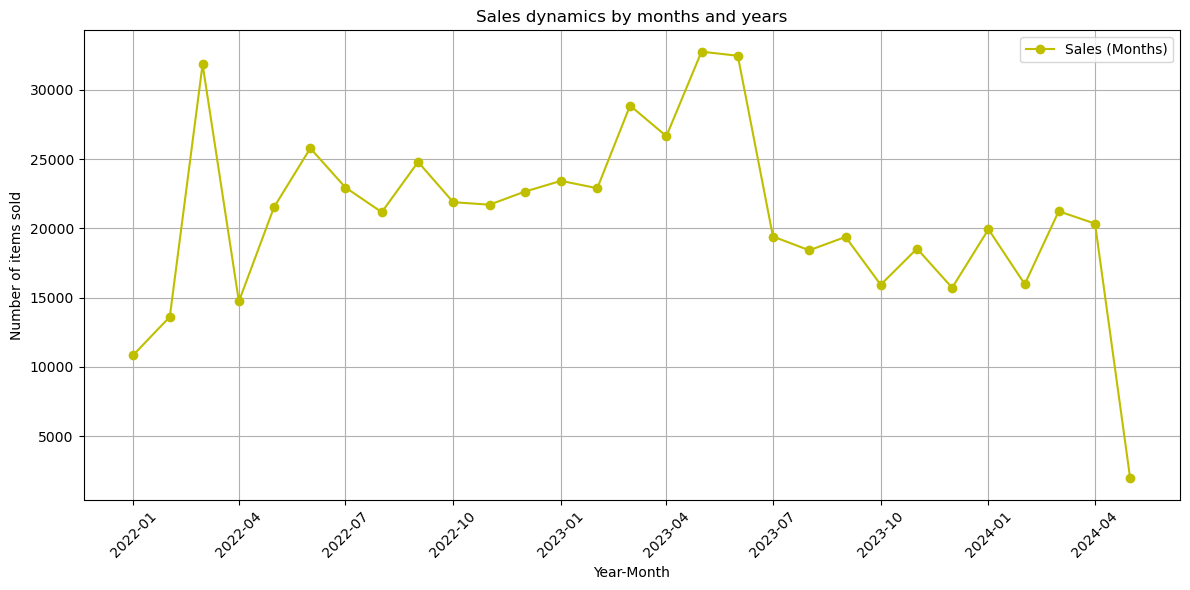

In [173]:
df_sales_analysis = df_sales.copy()

# Скоригуємо рік відповідно до дати продажу
df_sales_analysis['Year'] = pd.to_datetime(df_sales['date']).dt.year

# Створюємо нову колонку "Year-Month" для комбінування року та місяця
df_sales_analysis['Year_Month'] = df_sales_analysis['Year'].astype(int).astype(str) + '-' + df_sales_analysis['Month'].astype(int).astype(str)
monthly_sales_all_years = df_sales_analysis.groupby('Year_Month').agg({'Item_purchased_count': 'sum'})
monthly_sales_all_years.index = pd.to_datetime(monthly_sales_all_years.index, format='%Y-%m')
monthly_sales_all_years = monthly_sales_all_years.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_all_years.index, monthly_sales_all_years['Item_purchased_count'], marker='o', color='y', label='Sales (Months)')
plt.title('Sales dynamics by months and years')
plt.xlabel('Year-Month')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


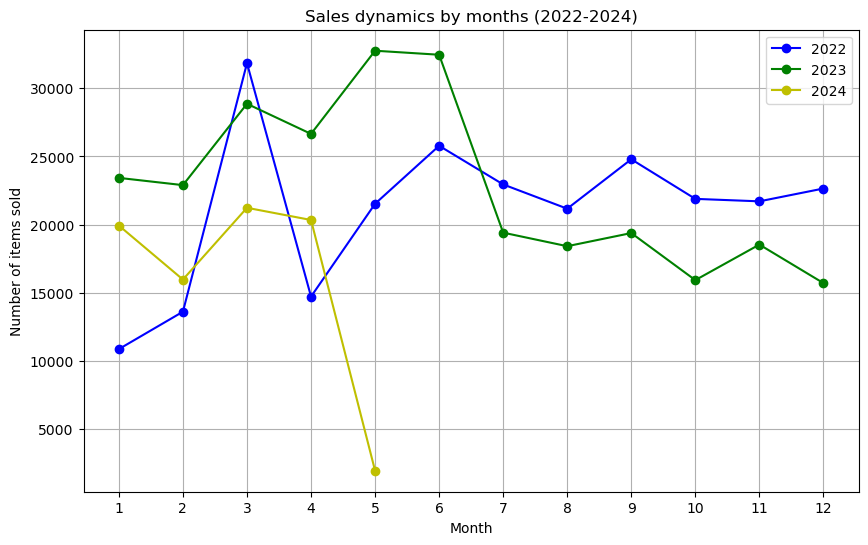

In [174]:
# Маємо пропуски по цінах, але можемо проаналізувати сезонність незалежно від цього

# Фільтруємо дані по роках
sales_2022 = df_sales_analysis[df_sales_analysis['Year'] == 2022]
sales_2023 = df_sales_analysis[df_sales_analysis['Year'] == 2023]
sales_2024 = df_sales_analysis[df_sales_analysis['Year'] == 2024]
# Групуємо дані за місяцями для кожного року
monthly_sales_2022 = sales_2022.groupby('Month').agg({'Item_purchased_count': 'sum'})
monthly_sales_2023 = sales_2023.groupby('Month').agg({'Item_purchased_count': 'sum'})
monthly_sales_2024 = sales_2024.groupby('Month').agg({'Item_purchased_count': 'sum'})


plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_2022.index, monthly_sales_2022['Item_purchased_count'], marker='o', color='b', label='2022')
plt.plot(monthly_sales_2023.index, monthly_sales_2023['Item_purchased_count'], marker='o', color='g', label='2023')
plt.plot(monthly_sales_2024.index, monthly_sales_2024['Item_purchased_count'], marker='o', color='y', label='2024')

# Додаємо підписи та заголовок
plt.title('Sales dynamics by months (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend()
plt.show()




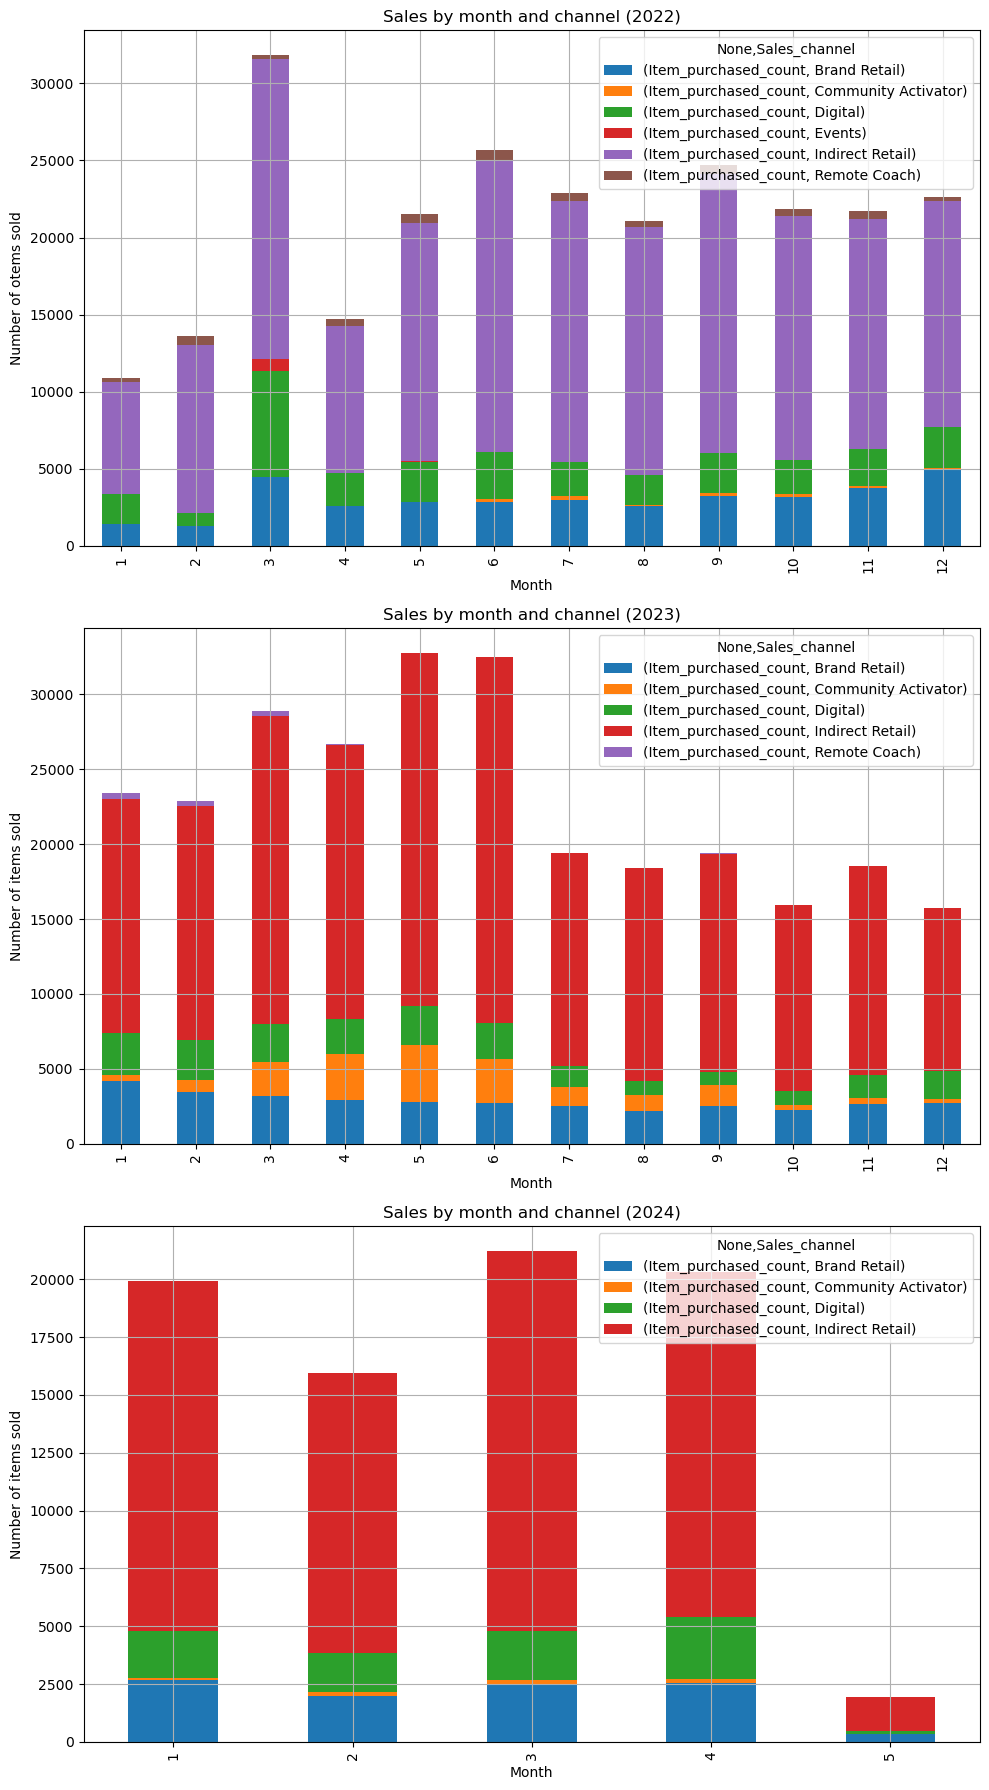

In [175]:
import matplotlib.pyplot as plt

channel_sales_2022 = sales_2022.groupby(['Month', 'Sales_channel']).agg({'Item_purchased_count': 'sum'}).unstack()
channel_sales_2023 = sales_2023.groupby(['Month', 'Sales_channel']).agg({'Item_purchased_count': 'sum'}).unstack()
channel_sales_2024 = sales_2024.groupby(['Month', 'Sales_channel']).agg({'Item_purchased_count': 'sum'}).unstack()

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
channel_sales_2022.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Sales by month and channel (2022)')
axs[0].set_xlabel('Мonth')
axs[0].set_ylabel('Number of otems sold')
axs[0].grid(True)
channel_sales_2023.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Sales by month and channel (2023)')
axs[1].set_xlabel('Мonth')
axs[1].set_ylabel('Number of items sold')
axs[1].grid(True)
channel_sales_2024.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Sales by month and channel (2024)')
axs[2].set_xlabel('Мonth')
axs[2].set_ylabel('Number of items sold')
axs[2].grid(True)

plt.tight_layout()
plt.show()


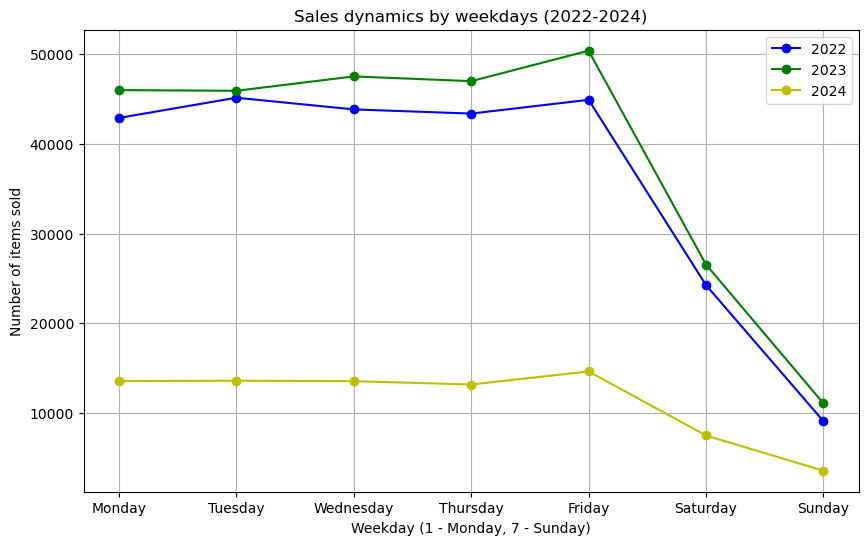

In [176]:
import matplotlib.pyplot as plt

weekly_sales_2022 = sales_2022.groupby('Day').agg({'Item_purchased_count': 'sum'})
weekly_sales_2023 = sales_2023.groupby('Day').agg({'Item_purchased_count': 'sum'})
weekly_sales_2024 = sales_2024.groupby('Day').agg({'Item_purchased_count': 'sum'})

plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_2022.index, weekly_sales_2022['Item_purchased_count'], marker='o', color='b', label='2022')
plt.plot(weekly_sales_2023.index, weekly_sales_2023['Item_purchased_count'], marker='o', color='g', label='2023')
plt.plot(weekly_sales_2024.index, weekly_sales_2024['Item_purchased_count'], marker='o', color='y', label='2024')
plt.title('Sales dynamics by weekdays (2022-2024)')
plt.xlabel('Weekday (1 - Monday, 7 - Sunday)')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.xticks(range(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.legend()
plt.show()


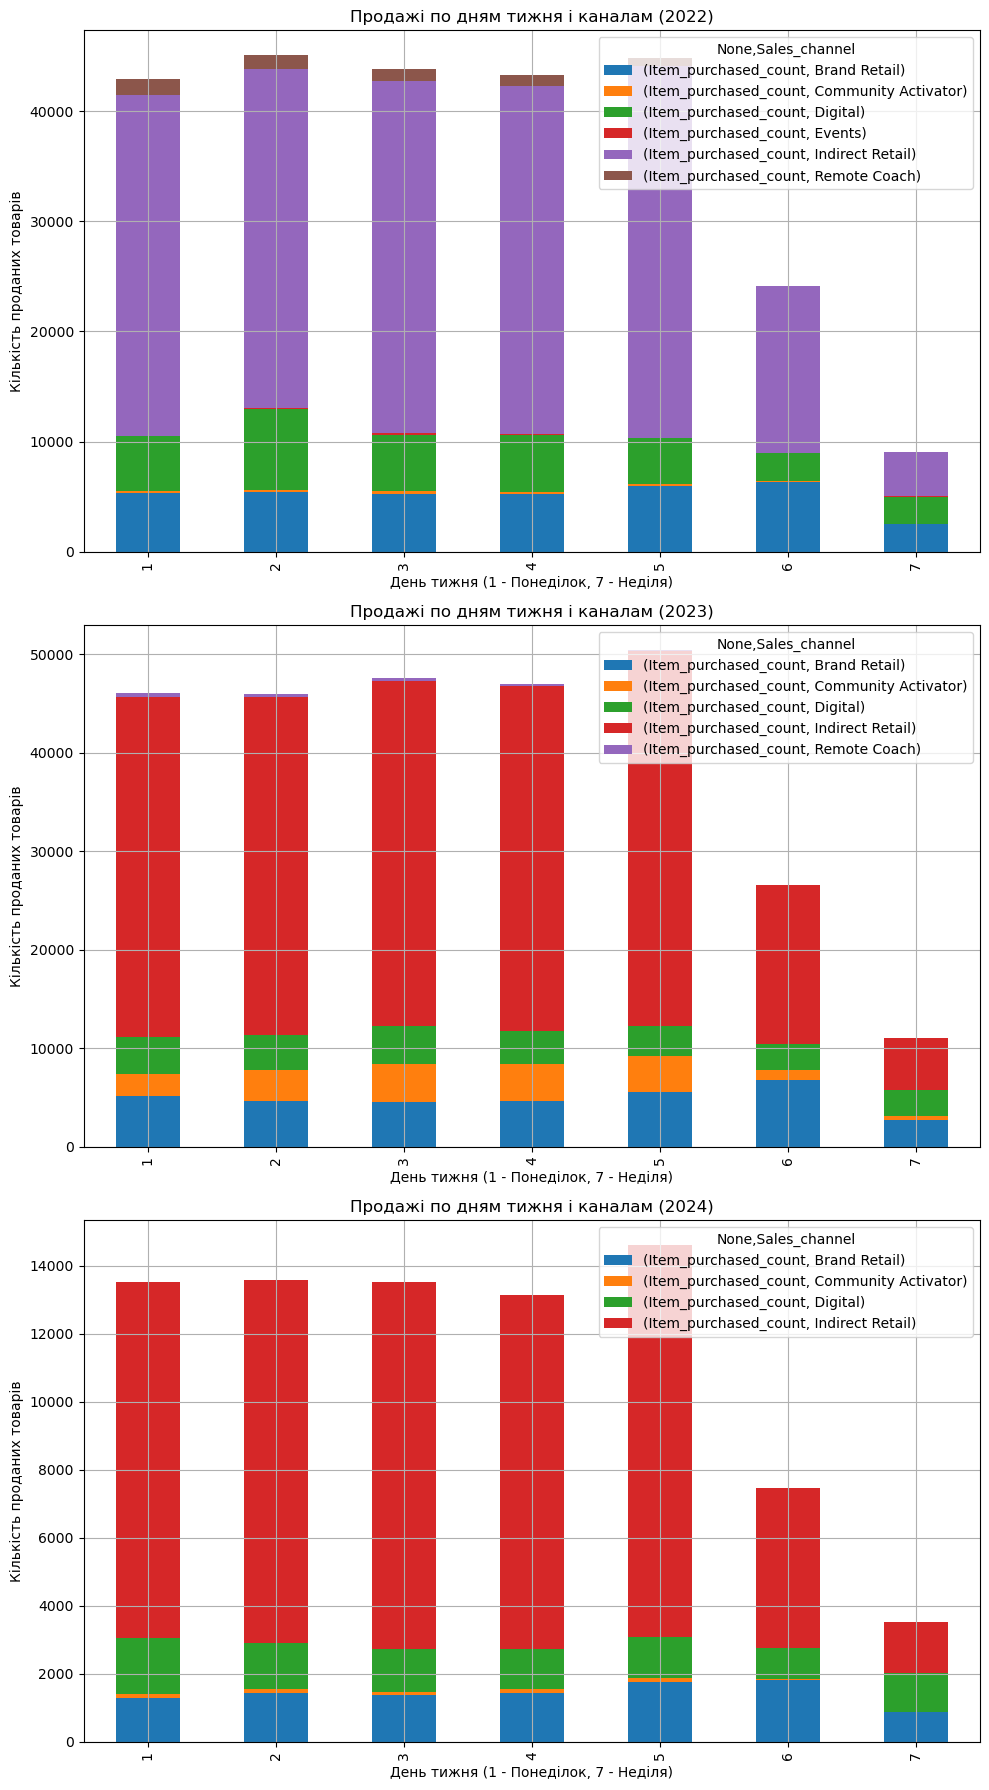

In [177]:
# Групуємо дані по днях тижня і каналах для кожного року
channel_sales_week_2022 = sales_2022.groupby(['Day', 'Sales_channel']).agg({'Item_purchased_count': 'sum'}).unstack()
channel_sales_week_2023 = sales_2023.groupby(['Day', 'Sales_channel']).agg({'Item_purchased_count': 'sum'}).unstack()
channel_sales_week_2024 = sales_2024.groupby(['Day', 'Sales_channel']).agg({'Item_purchased_count': 'sum'}).unstack()


fig, axs = plt.subplots(3, 1, figsize=(10, 18))
channel_sales_week_2022.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Продажі по дням тижня і каналам (2022)')
axs[0].set_xlabel('День тижня (1 - Понеділок, 7 - Неділя)')
axs[0].set_ylabel('Кількість проданих товарів')
axs[0].grid(True)
channel_sales_week_2023.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Продажі по дням тижня і каналам (2023)')
axs[1].set_xlabel('День тижня (1 - Понеділок, 7 - Неділя)')
axs[1].set_ylabel('Кількість проданих товарів')
axs[1].grid(True)
channel_sales_week_2024.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Продажі по дням тижня і каналам (2024)')
axs[2].set_xlabel('День тижня (1 - Понеділок, 7 - Неділя)')
axs[2].set_ylabel('Кількість проданих товарів')
axs[2].grid(True)

plt.tight_layout()
plt.show()


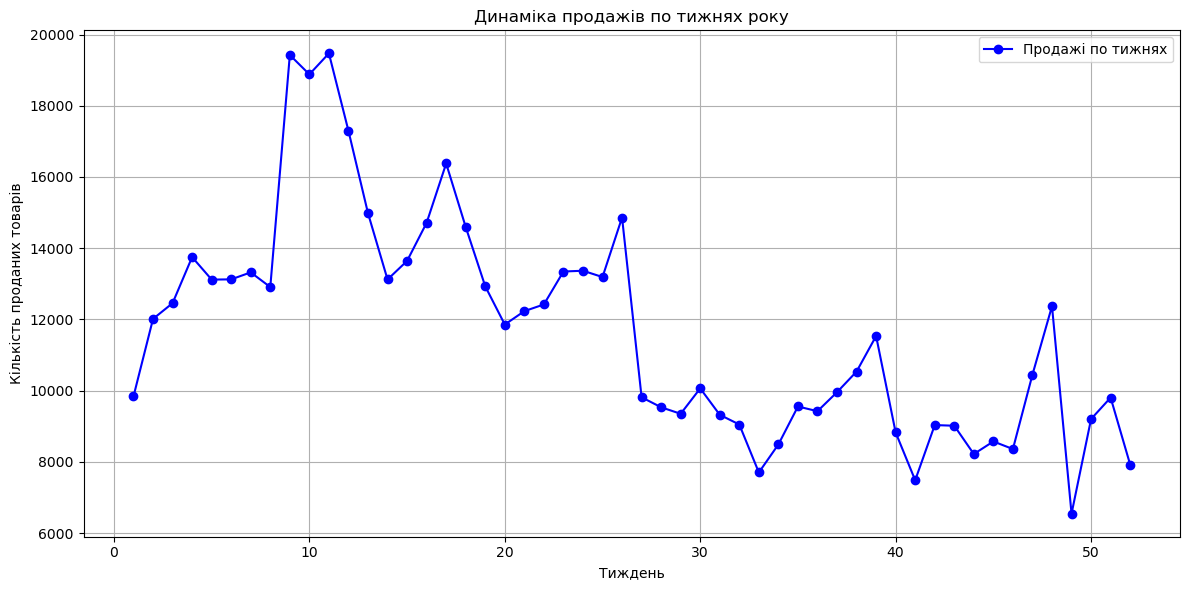

In [178]:
import matplotlib.pyplot as plt

# Групуємо дані за тижнями та рахуємо загальну кількість проданих товарів
weekly_sales = df_sales_analysis.groupby('Week').agg({'Item_purchased_count': 'sum'})

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales['Item_purchased_count'], marker='o', color='b', label='Продажі по тижнях')
plt.title('Динаміка продажів по тижнях року')
plt.xlabel('Тиждень')
plt.ylabel('Кількість проданих товарів')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


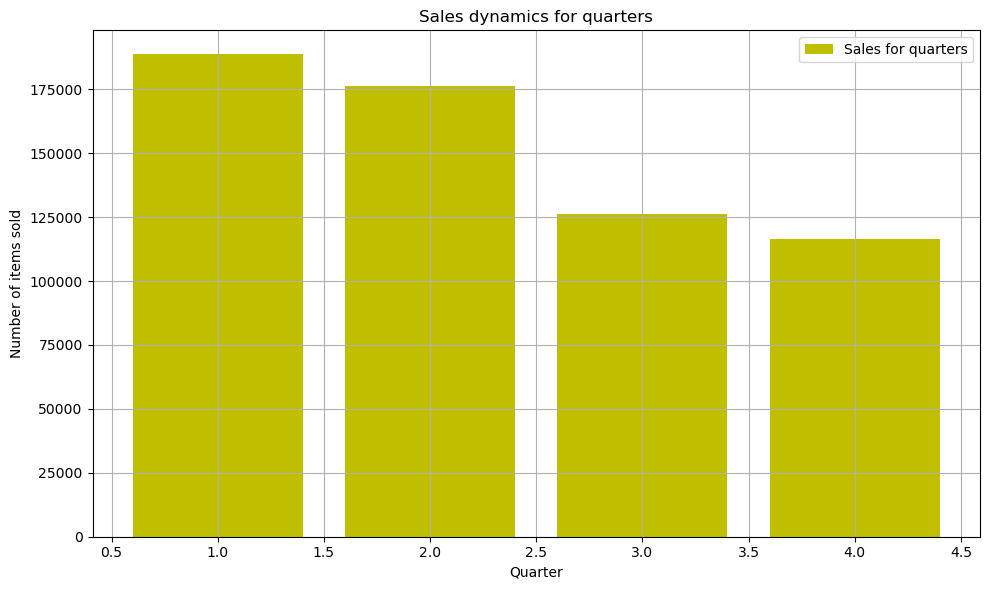

In [179]:
df_sales_analysis['Quarter'] = pd.to_datetime(df_sales_analysis['date']).dt.quarter

# Групуємо дані за кварталами та рахуємо загальну кількість проданих товарів
quarterly_sales = df_sales_analysis.groupby('Quarter').agg({'Item_purchased_count': 'sum'})

plt.figure(figsize=(10, 6))
plt.bar(quarterly_sales.index, quarterly_sales['Item_purchased_count'], color='y', label='Sales for quarters')
plt.title('Sales dynamics for quarters')
plt.xlabel('Quarter')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Top weeks of sales:
      Item_purchased_count
Week                      
11                   19472
9                    19426
10                   18882
12                   17296
17                   16379
13                   14982
26                   14861
16                   14713
18                   14596
4                    13750


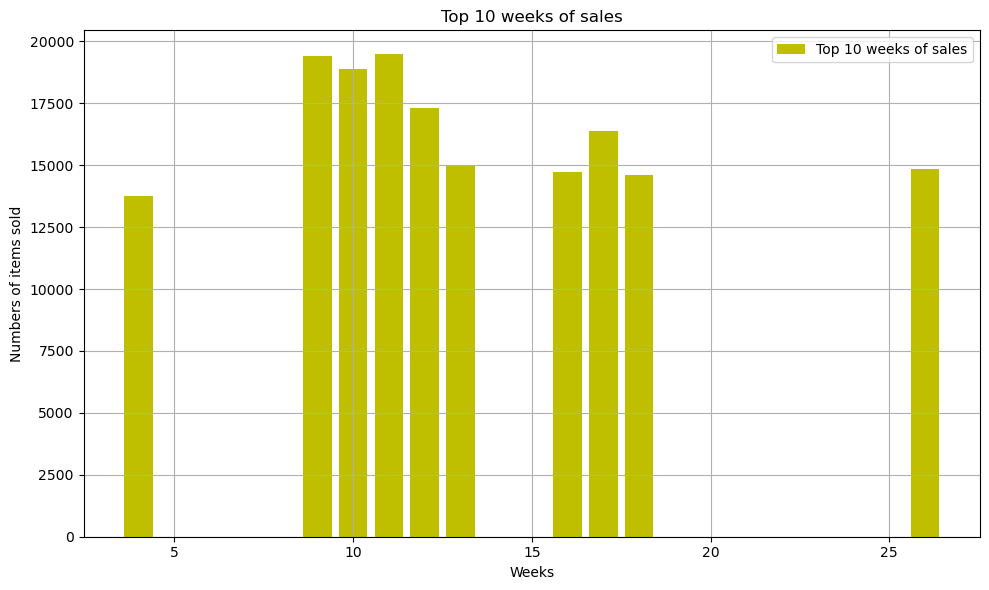

In [180]:
# Знаходимо тижні з найбільшими продажами
top_weeks = weekly_sales.sort_values(by='Item_purchased_count', ascending=False).head(10)

print("Top weeks of sales:")
print(top_weeks)

plt.figure(figsize=(10, 6))
plt.bar(top_weeks.index, top_weeks['Item_purchased_count'], color='y', label='Top 10 weeks of sales')
plt.title('Top 10 weeks of sales')
plt.xlabel('Weeks')
plt.ylabel('Numbers of items sold')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [181]:
# Calculate Price_final and Total_sales
df_sales_analysis = df_sales.dropna()
df_sales_analysis['Price_final'] = df_sales_analysis['Price_initial'] - df_sales_analysis['Discount']
df_sales_analysis['Total_sales'] = df_sales_analysis['Item_purchased_count'] * df_sales_analysis['Price_final']
print(df_sales_analysis.head())

   Item_purchased_count  Price_initial  Discount    Sales_channel       date  \
0                     1           69.0      40.0          Digital 2022-01-01   
1                     1           69.0      20.0  Indirect Retail 2022-01-01   
2                     1           69.0       0.0  Indirect Retail 2022-01-01   
3                     1           69.0      40.0          Digital 2022-01-01   
4                     1           69.0      40.0          Digital 2022-01-01   

   Day  Week  Month  Year  Price_final  Total_sales  
0    6    52      1  2021         29.0         29.0  
1    6    52      1  2021         49.0         49.0  
2    6    52      1  2021         69.0         69.0  
3    6    52      1  2021         29.0         29.0  
4    6    52      1  2021         29.0         29.0  


/var/folders/z4/2m5817mx51x2rb8v5mqg1qtw0000gn/T/ipykernel_65565/3895850619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_analysis['Price_final'] = df_sales_analysis['Price_initial'] - df_sales_analysis['Discount']
/var/folders/z4/2m5817mx51x2rb8v5mqg1qtw0000gn/T/ipykernel_65565/3895850619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_analysis['Total_sales'] = df_sales_analysis['Item_purchased_count'] * df_sales_analysis['Price_final']


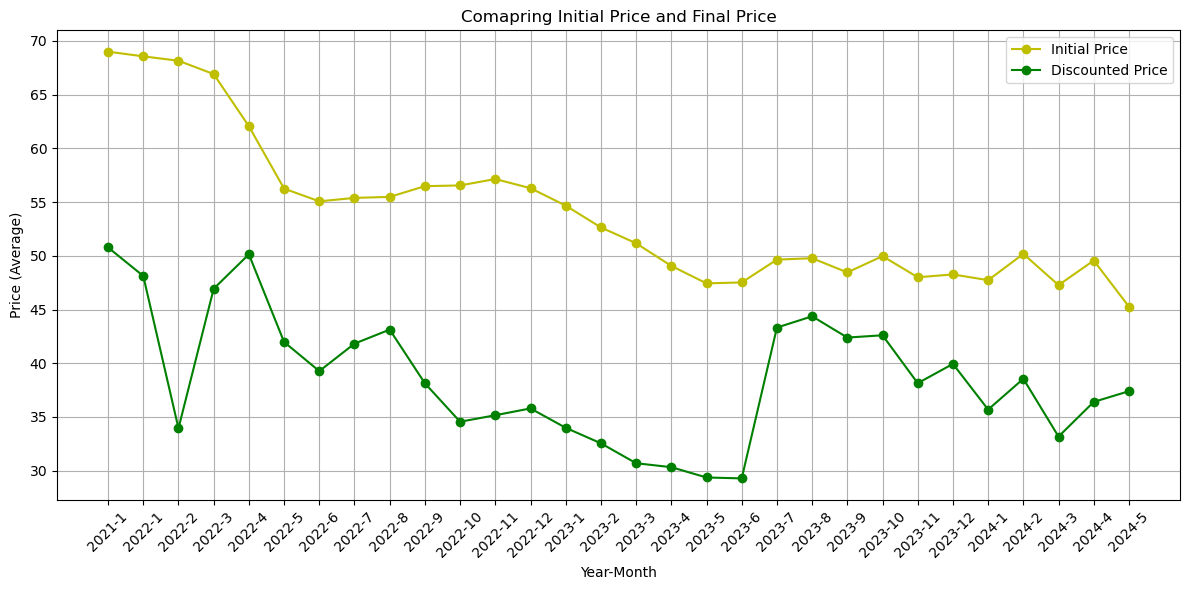

In [182]:
import matplotlib.pyplot as plt

# Групуємо дані за місяцями та рахуємо середню ціну
monthly_prices = df_sales_analysis.groupby(['Year', 'Month']).agg({'Price_initial': 'mean', 'Price_final': 'mean'}).reset_index()
monthly_prices['Year_Month'] = monthly_prices['Year'].astype(int).astype(str) + '-' + monthly_prices['Month'].astype(int).astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices['Year_Month'], monthly_prices['Price_initial'], marker='o', color='y', label='Initial Price')
plt.plot(monthly_prices['Year_Month'], monthly_prices['Price_final'], marker='o', color='g', label='Discounted Price')
plt.title('Comapring Initial Price and Final Price')
plt.xlabel('Year-Мonth')
plt.ylabel('Price (Average)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



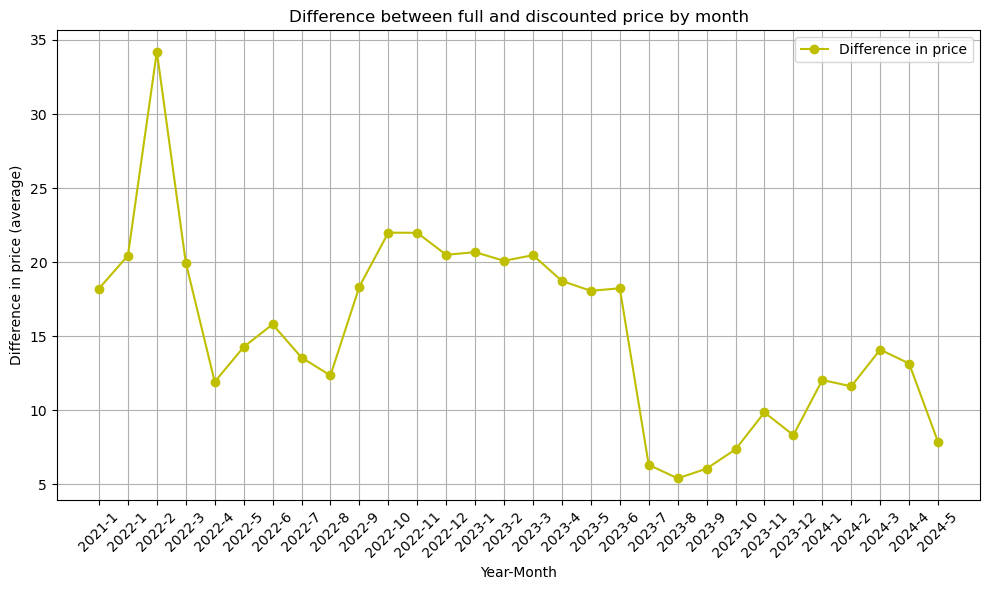

In [183]:
# Розраховуємо різницю між повною і зниженою ціною
monthly_prices['Price_difference'] = monthly_prices['Price_initial'] - monthly_prices['Price_final']

plt.figure(figsize=(10, 6))
plt.plot(monthly_prices['Year_Month'], monthly_prices['Price_difference'], marker='o', color='y', label='Difference in price')
plt.title('Difference between full and discounted price by month')
plt.xlabel('Year-Мonth')
plt.ylabel('Difference in price (average)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


/var/folders/z4/2m5817mx51x2rb8v5mqg1qtw0000gn/T/ipykernel_65565/1352435767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_analysis['Year_Month'] = df_sales_analysis['date'].dt.to_period('M')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/l

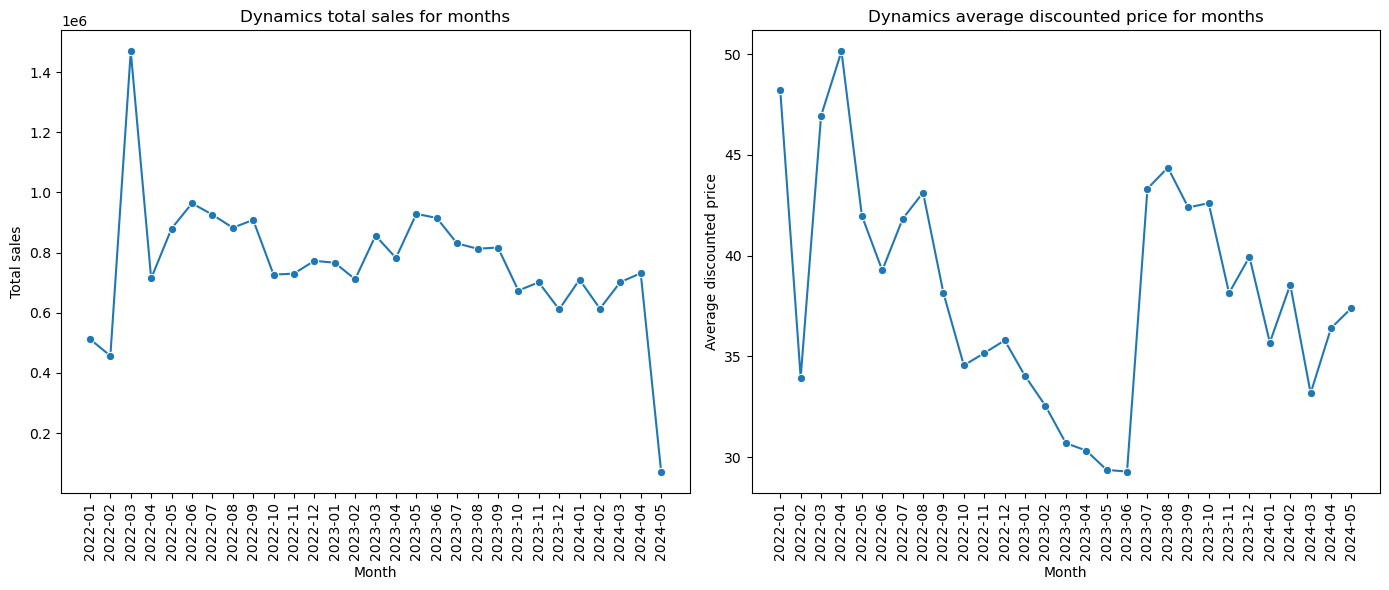

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_sales_analysis['Year_Month'] = df_sales_analysis['date'].dt.to_period('M')

# Групування та розрахунок загальних продажів і середньої ціни зниженої по місяцях
monthly_sales = df_sales_analysis.groupby('Year_Month')['Total_sales'].sum()
monthly_avg_price_final = df_sales_analysis.groupby('Year_Month')['Price_final'].mean()


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Dynamics total sales for months')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.lineplot(x=monthly_avg_price_final.index.astype(str), y=monthly_avg_price_final.values, marker='o')
plt.xlabel('Мonth')
plt.ylabel('Average discounted price')
plt.title('Dynamics average discounted price for months')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
# Розподіл знижок
plt.figure(figsize=(10, 6))
sns.histplot(df_sales_analysis['Discount'], kde=True)
plt.title('Розподіл знижок')
plt.xlabel('Знижка')
plt.ylabel('Частота')
plt.show()

# Зміни цін з часом
price_change_by_year = df_sales_analysis.groupby('Year')[['Price_initial', 'Price_final']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=price_change_by_year, x='Year', y='Price_initial', label='Початкова ціна')
sns.lineplot(data=price_change_by_year, x='Year', y='Price_final', label='Фінальна ціна')
plt.title('Зміни цін з часом')
plt.xlabel('Рік')
plt.ylabel('Ціна')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
#описові статистики

df_sales_analysis['Year'] = pd.to_datetime(df_sales['date']).dt.year

# Групуємо дані по роках і додаємо max та min
yearly_stats = df_sales_analysis.groupby('Year').agg({
    'Item_purchased_count': ['sum', 'mean', 'max', 'min'],
    'Price_initial': ['mean', 'max', 'min'],
    'Price_final': ['mean', 'max', 'min'],
    'Total_sales': ['sum', 'mean', 'max', 'min']
})

# Додавання стилю до виведеної таблиці Pandas
yearly_stats_styled = yearly_stats.style.format("{:.2f}") \
                                        .set_caption("Yearly Sales Statistics") \
                                        .background_gradient(cmap="coolwarm", subset=['Item_purchased_count', 'Price_initial', 'Price_final', 'Total_sales']) \
                                        .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]}])

# Виведення
yearly_stats_styled




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sales_analysis = df_sales_analysis.sort_values(['Year', 'Month'])
monthly_sales = df_sales_analysis.groupby(['Year', 'Month'])['Total_sales'].sum().reset_index()
monthly_sales['Growth_rate (%)'] = monthly_sales['Total_sales'].pct_change() * 100
monthly_sales['Year_Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Growth_rate (%)', data=monthly_sales, marker='o', color='y')
plt.title('Monthly Growth Rates of Sales')
plt.xlabel('Year-Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Перетворення змінної 'Sales_channel' на числовий формат (label encoding)
df_sales_analysis['Sales_channel_encoded'] = df_sales_analysis['Sales_channel'].astype('category').cat.codes

# Побудова кореляційної матриці з новими змінними
correlation_matrix = df_sales_analysis[['Item_purchased_count', 'Price_final', 'Discount', 'Month', 'Day', 'Sales_channel_encoded']].corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
# Додаємо колонку 'Revenue', що враховує знижку
df_sales_analysis['Revenue'] = df_sales_analysis['Price_initial'] * df_sales_analysis['Item_purchased_count'] * (1 - df_sales_analysis['Discount'] / 100)
# Групуємо по місяцях, щоб отримати сумарну виручку та інші метрики
monthly_sales_analysis = df_sales_analysis.groupby('Month').agg({
    'Item_purchased_count': 'sum',
    'Revenue': 'sum', 
    'Discount': 'mean', 
    'Price_initial': 'mean', 
    'Day': 'mean', 
    'Sales_channel_encoded': 'mean'
}).reset_index()

# Переглядаємо результат
print(monthly_sales_analysis.head())


# Групуємо дані по місяцях, щоб отримати статистику для кожної змінної
yearly_stats = df_sales_analysis.groupby('Month').agg({
    'Item_purchased_count': ['sum', 'mean', 'min', 'max'],
    'Revenue': ['sum', 'mean', 'min', 'max'],
    'Price_initial': ['mean', 'min', 'max'],
    'Discount': ['mean', 'min', 'max']
}).reset_index()

# Переглядаємо результат
print(yearly_stats)


# Перейменовуємо для зручності
yearly_stats.rename(columns={'Revenue': 'Total_sales', 'Price_initial': 'Price_final'}, inplace=True)

# Додавання стилю до виведеної таблиці Pandas
yearly_stats_styled = yearly_stats.style.format("{:.2f}") \
                                        .set_caption("Yearly Sales Statistics") \
                                        .background_gradient(cmap="coolwarm", subset=['Item_purchased_count', 'Price_final', 'Total_sales']) \
                                        .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]}])

# Виведення таблиці
yearly_stats_styled



In [ ]:

df_media = pd.read_excel(excel_file, sheet_name='media data', engine='openpyxl')
# Cleaning media sheet

df_media = df_media.drop(columns=['Unnamed: 8', 'please refer to data inputs as number of impresssions on respective date'])

# Видалення стовпця 'Row Labels'
df_media = df_media.drop(columns=['Row Labels'])

#missing values check
print(df_media.isnull().sum())



df_media['PIVOT_DATE'] = pd.to_datetime(df_media['PIVOT_DATE'])
df_media['Month'] = df_media['PIVOT_DATE'].dt.month
df_media['Day'] = df_media['PIVOT_DATE'].dt.day
df_media['Day_of_Week'] = df_media['PIVOT_DATE'].dt.weekday + 1
df_media['Week'] = df_media['PIVOT_DATE'].dt.isocalendar().week

print(df_media.head())

In [ ]:
df_media['Total_Impressions'] = df_media[['Audio', 'Branded Content', 'Display', 'VOL']].sum(axis=1)
import matplotlib.pyplot as plt

# Графік імпресій за датою
plt.figure(figsize=(10, 6))
plt.plot(df_media['PIVOT_DATE'], df_media['Total_Impressions'], marker='o', linestyle='-', color='y')
plt.title('Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Impressions')
plt.grid(True)
plt.show()


In [ ]:
df_media['Audio_%'] = df_media['Audio'] / df_media['Total_Impressions'] * 100
df_media['Branded_Content_%'] = df_media['Branded Content'] / df_media['Total_Impressions'] * 100
df_media['Display_%'] = df_media['Display'] / df_media['Total_Impressions'] * 100
df_media['VOL_%'] = df_media['VOL'] / df_media['Total_Impressions'] * 100
# Графік зміни % каналів
plt.figure(figsize=(10, 6))

plt.plot(df_media['PIVOT_DATE'], df_media['Audio_%'], label='Audio')
plt.plot(df_media['PIVOT_DATE'], df_media['Branded_Content_%'], label='Branded Content')
plt.plot(df_media['PIVOT_DATE'], df_media['Display_%'], label='Display')
plt.plot(df_media['PIVOT_DATE'], df_media['VOL_%'], label='VOL')

plt.title('Media Channel Decomposition Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Розрахунок кореляції між каналами
channel_columns = ['Audio', 'Branded Content', 'Display', 'VOL']
correlation_matrix = df_media[channel_columns].corr()

# Виведення кореляційної матриці
print(correlation_matrix)
import seaborn as sns

# Візуалізація кореляційної матриці
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Media Channels')
plt.show()


In [ ]:
# Середня кількість імпресій за днями тижня
weekday_impressions = df_media.groupby('Day_of_Week')['Total_Impressions'].mean()

# Виведення результату
print(weekday_impressions)
# Середня кількість імпресій за тижнями
weekly_impressions = df_media.groupby('Week')['Total_Impressions'].mean()

# Виведення результату
print(weekly_impressions)
# Графік середньої кількості імпресій за днями тижня
plt.figure(figsize=(8, 6))
weekday_impressions.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Day of the Week')
plt.xlabel('Day of Week (1 = Monday, 7 = Sunday)')
plt.ylabel('Average Impressions')
plt.grid(True)
plt.show()
# Графік середньої кількості імпресій за тижнями
plt.figure(figsize=(8, 6))
weekly_impressions.plot(kind='line', marker='o', color='green')
plt.title('Average Impressions by Week')
plt.xlabel('Week Number')
plt.ylabel('Average Impressions')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_sales_m = pd.read_excel(excel_file, sheet_name='raw sales data', engine='openpyxl')
df_media_m = pd.read_excel(excel_file, sheet_name='media data', engine='openpyxl')

# Очищення та обробка
df_media_m = df_media_m.drop(columns=['Unnamed: 8', 'please refer to data inputs as number of impresssions on respective date'])

# Заповнення пропусків у даних продажів
df_sales_m['Day'] = df_sales_m['Day'].fillna(df_sales_m['date'].dt.dayofweek + 1)
df_sales_m['Year'] = df_sales_m['Year'].fillna(df_sales_m['date'].dt.year)
df_sales_m['Month'] = df_sales_m['Month'].fillna(df_sales_m['date'].dt.month)
df_sales_m['Week'] = df_sales_m['Week'].fillna(df_sales_m['date'].dt.isocalendar().week)
df_sales_m['Year'] = df_sales_m['Year'].astype(int)
df_sales_m['Week'] = df_sales_m['Week'].astype(int)
df_sales_m['Month'] = df_sales_m['Month'].astype(int)
df_sales_m = df_sales_m.drop(columns=['week_of_sale'])

# Заповнення пропусків у ціні та знижці середнім за місяць
df_sales_m['Price_initial'] = df_sales_m.groupby(['Year', 'Month'])['Price_initial'].transform(lambda x: x.fillna(x.mean()))
df_sales_m['Discount'] = df_sales_m.groupby(['Year', 'Month'])['Discount'].transform(lambda x: x.fillna(x.mean()))

# Заповнення пропусків у каналі продажів найпоширенішим значенням
df_sales_m['Sales_channel'] = df_sales_m['Sales_channel'].fillna(df_sales_m['Sales_channel'].mode()[0])
# Скоригуємо рік відповідно до дати продажу
df_sales_m['Year'] = pd.to_datetime(df_sales['date']).dt.year
# Перетворення колонок з датами на формат datetime
df_sales_m['date'] = pd.to_datetime(df_sales_m['date'], format='%Y-%m-%d')
df_media_m['PIVOT_DATE'] = pd.to_datetime(df_media_m['PIVOT_DATE'], format='%Y-%m-%d')

# Об'єднання таблиць за датами
merged_df = pd.merge(df_sales_m, df_media_m, left_on='date', right_on='PIVOT_DATE', how='inner')

# OneHotEncoding для категорійних змінних (канали продажів)
encoder = OneHotEncoder(drop='first')  # Видаляємо одну з категорій
encoded_sales_channel = pd.DataFrame(encoder.fit_transform(merged_df[['Sales_channel']]).toarray(), 
                                     columns=encoder.get_feature_names_out(['Sales_channel']))

# Додаємо закодовані змінні до злитого датафрейму
merged_df_encoded = pd.concat([merged_df.drop(columns=['Sales_channel']), encoded_sales_channel], axis=1)

# Створення стовпця з виручкою, якщо його ще немає
merged_df_encoded['revenue'] = merged_df_encoded['Item_purchased_count'] * (merged_df_encoded['Price_initial'] - merged_df_encoded['Discount'])

# Агрегування даних за днями
daily_sales = merged_df_encoded.groupby(['date']).agg(
    total_items_sold=('Item_purchased_count', 'sum'),
    total_revenue=('revenue', 'sum'),
    total_discount=('Discount', 'sum'),
    weekday=('Day', 'min'),
    avg_price_initial=('Price_initial', 'mean'),
    Audio=('Audio', 'sum'),
    Branded_Content=('Branded Content', 'sum'),
    Display=('Display', 'sum'),
    VOL=('VOL', 'sum'),
    Grand_Total=('Grand Total', 'sum'),
    Sales_channel_Community_Activator=('Sales_channel_Community Activator', 'sum'),
    Sales_channel_Digital=('Sales_channel_Digital', 'sum'),
    Sales_channel_Events=('Sales_channel_Events', 'sum'),
    Sales_channel_Indirect_Retail=('Sales_channel_Indirect Retail', 'sum'),
    Sales_channel_Remote_Coach=('Sales_channel_Remote Coach', 'sum')
).reset_index()

# Визначення незалежних змінних (features) та залежної змінної (target)
X = daily_sales.drop(columns=['date', 'total_revenue'])  # Виключаємо залежну змінну та колонку з датою
y = daily_sales['total_revenue']

# Поділ на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')




In [ ]:
print(daily_sales.head())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))


plt.plot(y_test.values, label='Фактичні дані', color='blue', marker='o')
plt.plot(y_pred, label='Прогнозовані дані', color='red', linestyle='--', marker='x')

plt.xlabel('Спостереження')
plt.ylabel('Виручка')
plt.title('Порівняння фактичних і прогнозованих значень')
plt.legend()

# Показ графіка
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Обчислення MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Корінь з MSE (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Середня абсолютна похибка
r2 = r2_score(y_test, y_pred)  # Коефіцієнт детермінації R²

# Виведення результатів
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² (коефіцієнт детермінації): {r2}')


In [ ]:
# Виведення коефіцієнтів регресії
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)
